# Package Testing
Verifying functionality of open source packages I want to integrate into this project

In [6]:
# Librosa spectral features of audio
import librosa
import numpy as np

def extract_spectral_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Calculate Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    
    # Calculate Spectral Bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    
    # Calculate Spectral Flatness
    flatness = librosa.feature.spectral_flatness(y=y)
    
    # Calculate Spectral Rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    
    # Calculate MFCCs (Mel-Frequency Cepstral Coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Calculate Chroma Features (12 pitches)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Calculate Zero Crossing Rate (Noise)
    zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)
    
    return {
        'spectral_centroid': np.mean(centroid),
        'spectral_bandwidth': np.mean(bandwidth),
        'spectral_flatness': np.mean(flatness),
        'spectral_rolloff': np.mean(rolloff),
        'mfccs': np.mean(mfccs, axis=1),
        'chroma': np.mean(chroma, axis=1),
        'zcr': np.mean(zcr)
    }

# Example usage
features = extract_spectral_features('/workspaces/sonic_image_editing/input/audio/voide - canary.mp3')
print(features)

{'spectral_centroid': np.float64(3253.2847075271666), 'spectral_bandwidth': np.float64(3573.7424304083897), 'spectral_flatness': np.float32(0.0054191053), 'spectral_rolloff': np.float64(6530.191723049194), 'mfccs': array([-72.80253  , 118.597664 ,  -9.272113 ,  48.98428  ,   3.4498005,
         9.625127 ,  -3.6244397,   5.12949  ,  -5.1427464,   5.63208  ,
        -3.4998758,   7.958691 ,  -5.303988 ], dtype=float32), 'chroma': array([0.5233884 , 0.48190948, 0.5277628 , 0.5273839 , 0.55801636,
       0.60592574, 0.5110218 , 0.6373926 , 0.54475933, 0.59959817,
       0.6219295 , 0.52678245], dtype=float32), 'zcr': array([[0.        , 0.        , 0.        , ..., 0.19921875, 0.18554688,
        0.13574219]])}


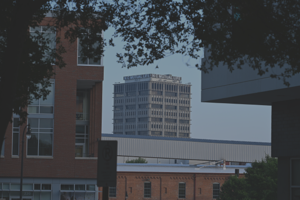

In [15]:
# ImageEnhance from PIL
from PIL import Image, ImageEnhance

def apply_film_effect(image_path, avg_frequency, avg_amplitude):
    # Open an image file
    image = Image.open(image_path)
    
    # Apply color enhancement based on audio features
    color_enhancer = ImageEnhance.Color(image)
    contrast_enhancer = ImageEnhance.Contrast(image)
    
    # Adjust enhancement factors based on audio analysis
    color_factor = min(max(avg_frequency / 100000, 0.5), 2)  # Example range [0.5, 2]
    contrast_factor = min(max(avg_amplitude / 10000, 0.5), 2)  # Example range [0.5, 2]
    
    enhanced_image = color_enhancer.enhance(color_factor)
    enhanced_image = contrast_enhancer.enhance(contrast_factor)
    
    return enhanced_image



img_out = apply_film_effect('/workspaces/sonic_image_editing/input/images/chamberlin - building.JPG',
                            0.5,
                           0.5)
img_out.thumbnail((300,300))
img_out.show()